## EMAIL SPAM CLASSIFICATION

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Fallback to a different encoding
    data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
data.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [5]:
data.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [8]:
data['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

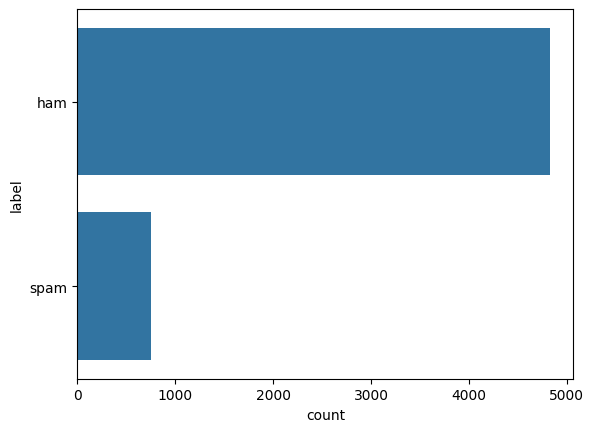

In [9]:
import seaborn as sns
sns.countplot(data['label'])

In [10]:
data.sample(5)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2044,ham,I can send you a pic if you like :),NaN,NaN,NaN
4051,ham,"Ya ok, then had dinner?",NaN,NaN,NaN
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,NaN,NaN,NaN
5178,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,NaN,NaN,NaN
507,ham,You should know now. So how's anthony. Are you...,NaN,NaN,NaN


In [11]:
data.rename(columns={'label':'target'},inplace=True)

In [12]:
data.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1905,ham,"There're some people by mu, I'm at the table b...",NaN,NaN,NaN
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,NaN,NaN,NaN
5211,ham,It is only yesterday true true.,NaN,NaN,NaN
5129,ham,"Rose for red,red for blood,blood for heart,hea...",NaN,NaN,NaN
4735,ham,"Not for possession, especially not first offense",NaN,NaN,NaN


In [14]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [17]:
encoder.fit_transform(data['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
data['target']=encoder.fit_transform(data['target'])

In [19]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#checking duplicate values
data.duplicated().sum()

np.int64(403)

In [22]:
data.shape

(5572, 2)

## 2.EDA

In [23]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20794b4da10>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41')])

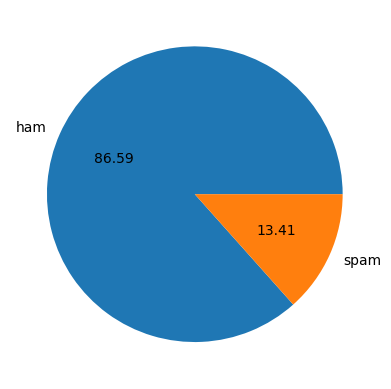

In [24]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [25]:
#data is imbalanced

In [26]:
import nltk

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
#num of characters
data['num_characters']=data['text'].apply(len)

In [29]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#num of words
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
#num of sentences
data['num_sent']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
data.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
#ham
data[data['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
data[data['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

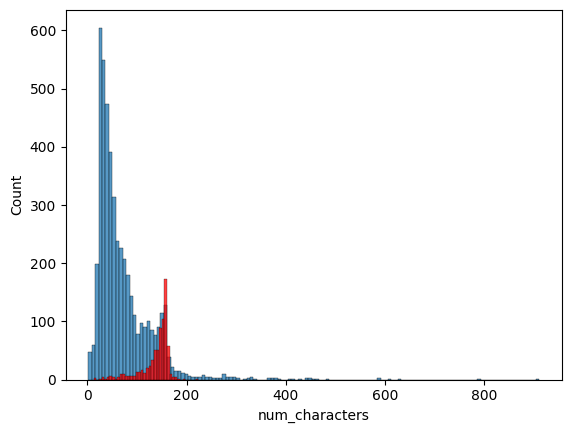

In [36]:
sns.histplot(data[data['target']==0]['num_characters']) #ham
sns.histplot(data[data['target']==1]['num_characters'],color='red') #spam

<Axes: xlabel='num_words', ylabel='Count'>

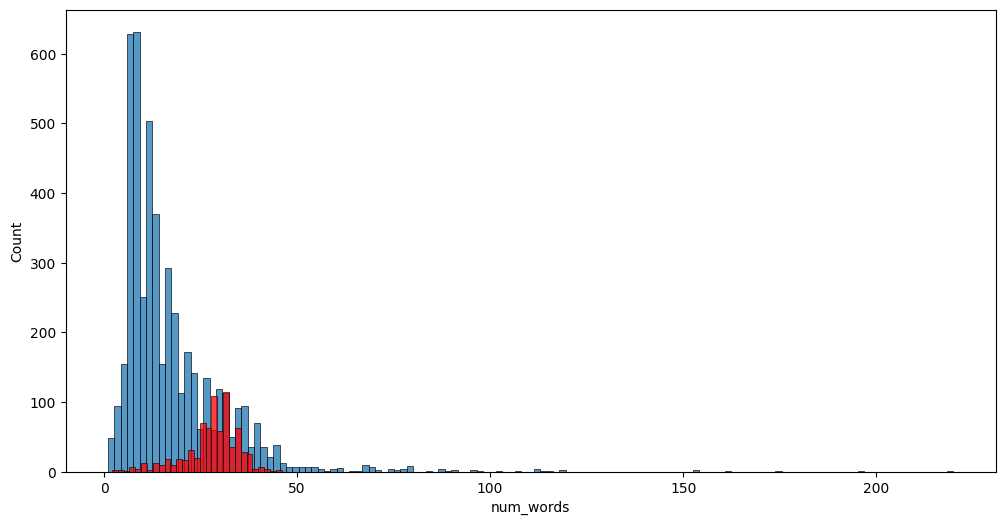

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words']) #ham
sns.histplot(data[data['target']==1]['num_words'],color='red') #spam

<Axes: xlabel='num_sent', ylabel='Count'>

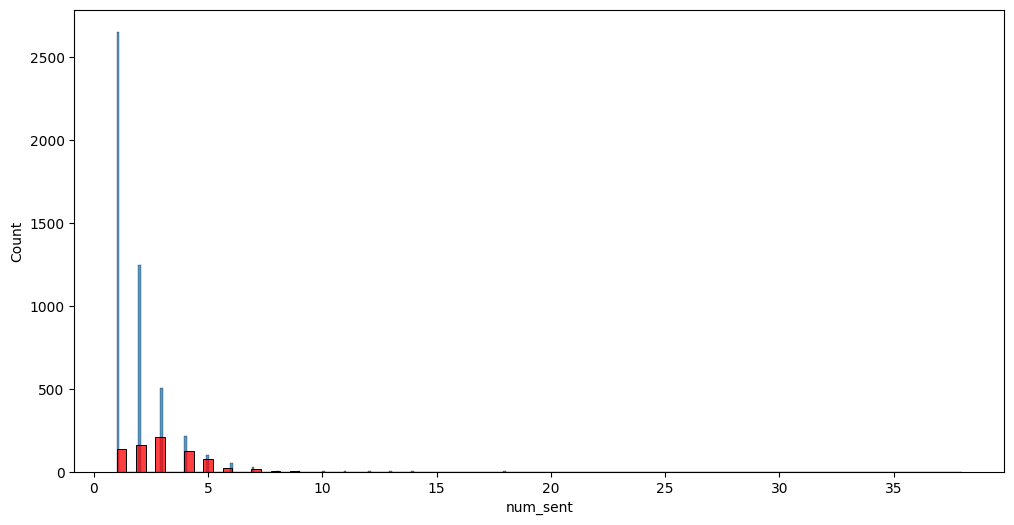

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_sent']) #ham
sns.histplot(data[data['target']==1]['num_sent'],color='red') #spam

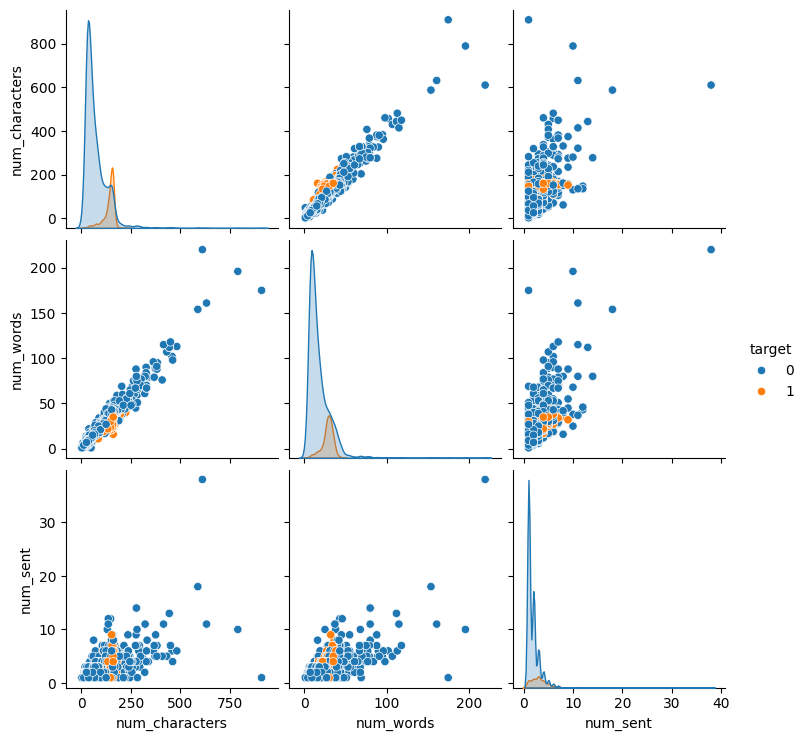

In [39]:
sns.pairplot(data,hue='target')
#

<Axes: >

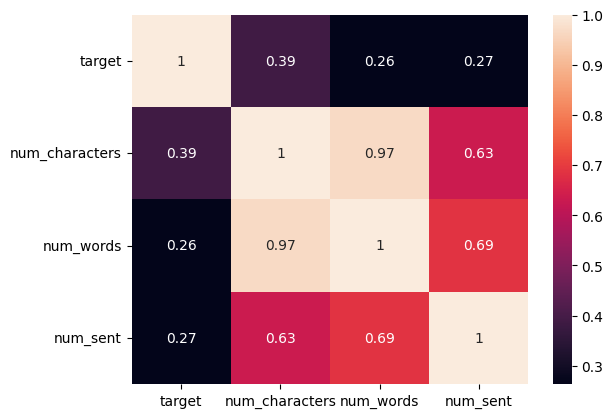

In [40]:
sns.heatmap(data[['target','num_characters','num_words','num_sent']].corr(),annot=True)

## 3.Data Preprocessing

In [41]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
          y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return  ' '.join(y)

In [43]:
transform_text("Subject: logistics enom team\r\nhal , as per our discussion here are the logistics people that will be\r\ndedicated to the enom development :\r\nkey subject experts :\r\nthe logistics managers for each of the various regions will be the key\r\nsubject expert and will pull in the added resources ( individual pipeline\r\nschedulers ) for the really detailed work . as far as time dedicated we will\r\ncommit to as much time as needed with the understanding that these\r\nindividuals do have the responsibility for managing all of the scheduling\r\nactivity in their regions . bottom line is during bid - week and when\r\nemergencies develop they will be needed at their trading desks . all meetings\r\nwith these individuals should be scheduled for the afternoon .\r\nkathy kelly - northeast\r\ned terry - southeast\r\nrandy gay - west\r\ngeorge smith - central\r\ndarren farmer - texas\r\nproject steering team :\r\nbob superty\r\nrandy gay\r\ngeorge smith\r\nas discussed we might have to bring in")

'subject logist enom team hal per discuss logist peopl dedic enom develop key subject expert logist manag variou region key subject expert pull ad resourc individu pipelin schedul realli detail work far time dedic commit much time need understand individu respons manag schedul activ region bottom line bid week emerg develop need trade desk meet individu schedul afternoon kathi kelli northeast ed terri southeast randi gay west georg smith central darren farmer texa project steer team bob superti randi gay georg smith discuss might bring'

In [44]:
data['text'][1000]

'No..but heard abt tat..'

In [45]:
data['transformed_text']=data['text'].apply(transform_text)

In [46]:
data.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

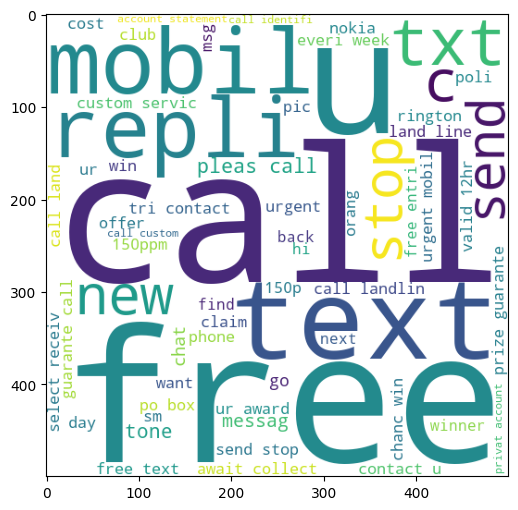

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

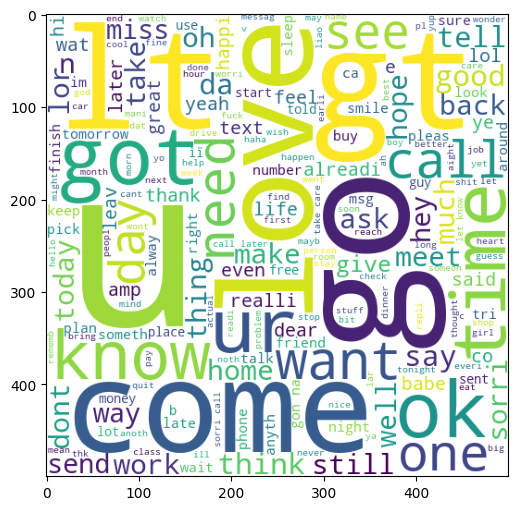

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [53]:
len(spam_corpus)

11490

In [54]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

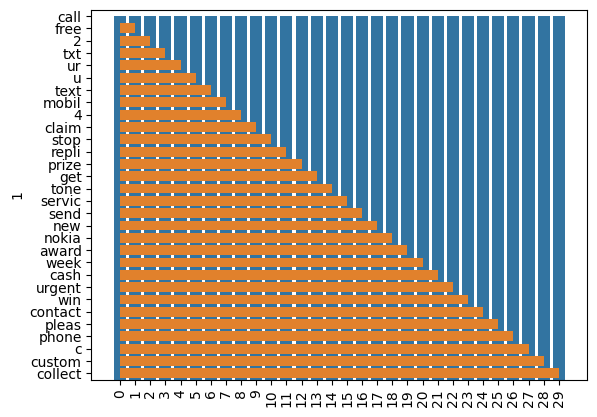

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

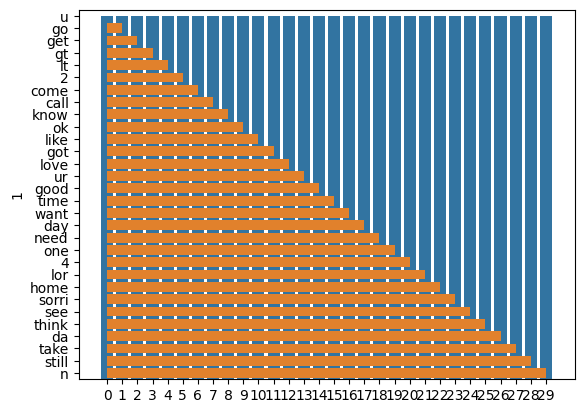

In [60]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

plt.show()

## 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tv=TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [62]:
x=tv.fit_transform(data['transformed_text']).toarray()

In [63]:
x.shape

(5572, 3000)

In [64]:
y=data['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_predict=gnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [70]:
mnb.fit(x_train,y_train)
y_predict=mnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [71]:
bnb.fit(x_train,y_train)
y_predict=bnb.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [72]:
#tfidf-->gnb
#cv-->gnb

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [76]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [77]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    c_accuracy,c_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    accuracy_scores.append(c_accuracy)
    precision_scores.append(c_precision)

In [78]:
data_frame = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [79]:
data_frame

,Algorithm,Accuracy,Precision
1,KN,0.903139,1.000000
8,ETC,0.973094,1.000000
2,NB,0.965022,0.991736
0,SVC,0.973094,0.984848
5,RF,0.968610,0.984252
4,LR,0.950673,0.955752
9,GBDT,0.939910,0.941748
7,BgC,0.960538,0.919118
6,AdaBoost,0.912108,0.894737
3,DT,0.924664,0.870000


In [80]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))